In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\Data Science - Rakamin\Bootcamp\Final Project\Data_Train_Model.csv')
df.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,ownhouse_norent_noown,ownhouse_owned,ownhouse_rented,State_Rank,Profession_Rank
0,0.129487,0.034483,0.15,0,0,0.75,0,0,0,1,24,10
1,0.228713,0.948276,0.60,0,0,0.75,1,0,0,1,24,10
2,0.946853,0.465517,0.00,0,0,0.50,0,0,0,1,24,10
3,0.275715,0.206897,0.20,0,0,0.25,0,0,0,1,24,10
4,0.129487,0.034483,0.15,0,0,0.75,0,0,0,1,24,10


In [3]:
X = df.drop(columns=['Risk_Flag'])
y = df['Risk_Flag']

In [4]:
X_res, y_res = SMOTE(0.4, random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)

In [5]:
y.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [6]:
y_res.value_counts()

0    221004
1     88401
Name: Risk_Flag, dtype: int64

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=50, random_state=42)

In [8]:
def check_scoring(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('Train score: ', model.score(X_train, y_train))
    print('Test score: ', model.score(X_test, y_test))
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision :', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('AUC: ', roc_auc_score(y_test, y_pred))
    print('F1: ', f1_score(y_test, y_pred))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [9]:
# K-Nearest Neighbors
check_scoring(knn)

Train score:  0.8976650983687547
Test score:  0.8766456228049385
Accuracy:  0.8766456228049385
Precision : 0.7526636484324472
Recall:  0.8408822970146416
AUC:  0.8658317418002694
F1:  0.794331082052019


In [10]:
# Decision Tree
check_scoring(dt)

Train score:  0.9400922510076968
Test score:  0.886664799293271
Accuracy:  0.886664799293271
Precision : 0.7489662573782393
Recall:  0.9023768777334094
AUC:  0.8914157150102253
F1:  0.8185456050779633


In [11]:
# Random Forest
check_scoring(rf)

Train score:  0.9400737823374873
Test score:  0.9071556312081188
Accuracy:  0.9071556312081188
Precision : 0.8016244070572979
Recall:  0.8933257273245864
AUC:  0.9029738351475547
F1:  0.8449944242598655


In [12]:
hyperparams = dict(n_estimators = [50,100,150,200,250],
                   max_depth = [25,30,35],
                   min_samples_split = [2,5,10],
                   min_samples_leaf = [1,2,4],
                   max_features = ['auto', 'sqrt', 'log2'])

rf = RandomForestClassifier()
rs = RandomizedSearchCV(rf, hyperparams, cv=5, random_state=42)
rs.fit(X_train, y_train)

show_best_hyperparameter(rs)

check_scoring(rs)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 35, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Train score:  0.9400922510076968
Test score:  0.9088147206481222
Accuracy:  0.9088147206481222
Precision : 0.8051894704412419
Recall:  0.894542688724092
AUC:  0.9044992367966965
F1:  0.8475174749585646


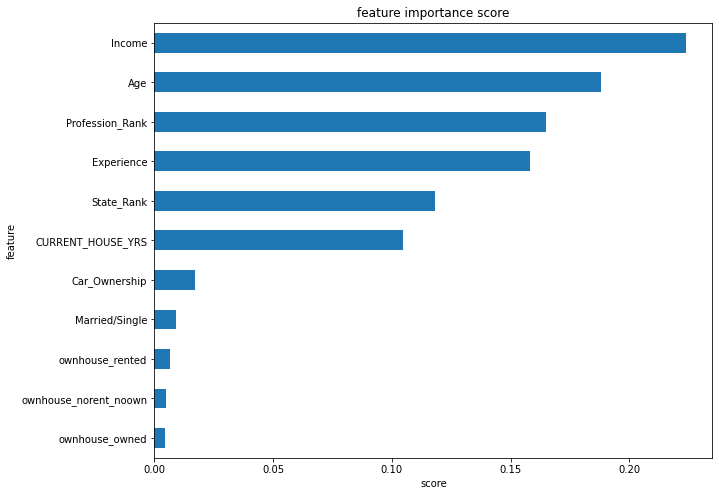

In [13]:
show_feature_importance(rs.best_estimator_)

In [14]:
# Drop unimportant variable
X_train.drop(columns=['Car_Ownership','Married/Single','ownhouse_rented','ownhouse_owned','ownhouse_norent_noown'])
X_test.drop(columns=['Car_Ownership','Married/Single','ownhouse_rented','ownhouse_owned','ownhouse_norent_noown'])

,Income,Age,Experience,CURRENT_HOUSE_YRS,State_Rank,Profession_Rank
163256,0.270157,0.672414,0.20,0.50,26,34
50369,0.208475,0.500000,0.10,0.25,6,16
272608,0.975073,0.172414,0.15,0.00,13,22
63347,0.706980,0.655172,0.35,0.50,13,35
255287,0.006561,0.206897,0.85,0.25,18,1
...,...,...,...,...,...,...
32020,0.505064,0.620690,0.15,0.50,10,38
41226,0.763661,0.431034,0.70,0.25,12,42
27188,0.717012,0.258621,0.80,0.75,10,9
94795,0.131866,0.068966,0.35,1.00,17,15


In [15]:
rs2 = RandomizedSearchCV(rf, hyperparams, cv=5, random_state=42)
rs2.fit(X_train, y_train)

check_scoring(rs2)

Train score:  0.9400922510076968
Test score:  0.9088362672642262
Accuracy:  0.9088362672642262
Precision : 0.8048271853953711
Recall:  0.895303289598783
AUC:  0.9047442538152797
F1:  0.8476577971411082


In [16]:
#Generate the confusion matrix
y_pred = rs2.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[60818  5709]
 [ 2753 23542]]


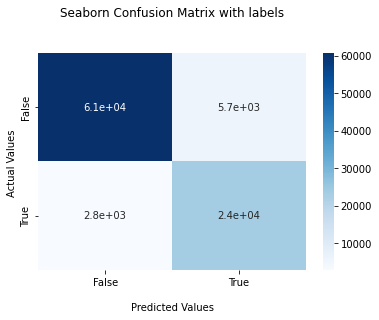

In [17]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()